In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

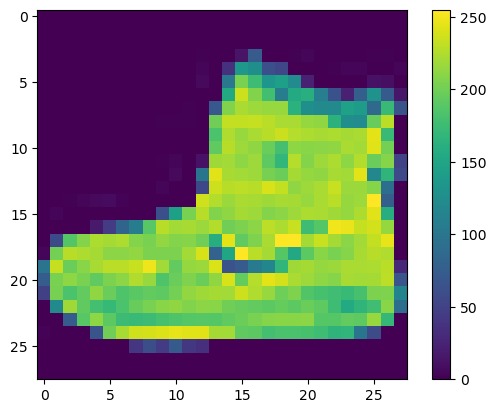

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

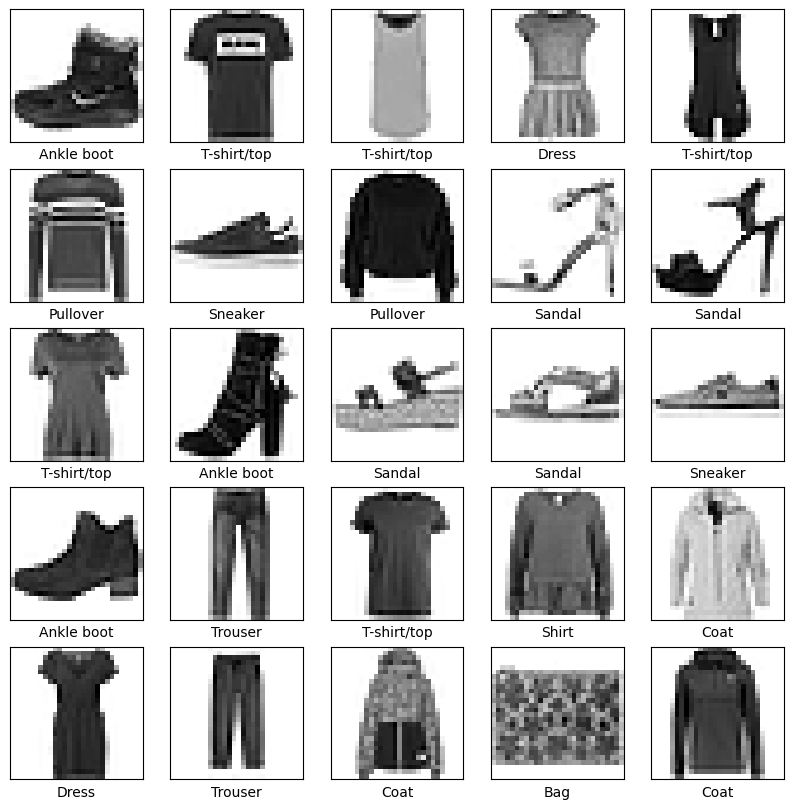

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)])

In [18]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30


1875/1875 [==============================] - 6s 3ms/step - loss: 3.8268 - accuracy: 0.6691
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8030 - accuracy: 0.7017
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6823 - accuracy: 0.7300
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6380 - accuracy: 0.7399
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6212 - accuracy: 0.7451
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6163 - accuracy: 0.7484
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5998 - accuracy: 0.7499
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6004 - accuracy: 0.7508
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5941 - accuracy: 0.7520
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7395 - accuracy: 0.7298 - 650ms/epoch - 2ms/step

Test accuracy: 0.7297999858856201


In [23]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [24]:

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [25]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 5.4412037e-03, 0.0000000e+00, 1.8772905e-03,
       1.5822996e-15, 9.9268144e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])


9

In [28]:
test_labels[0]

9

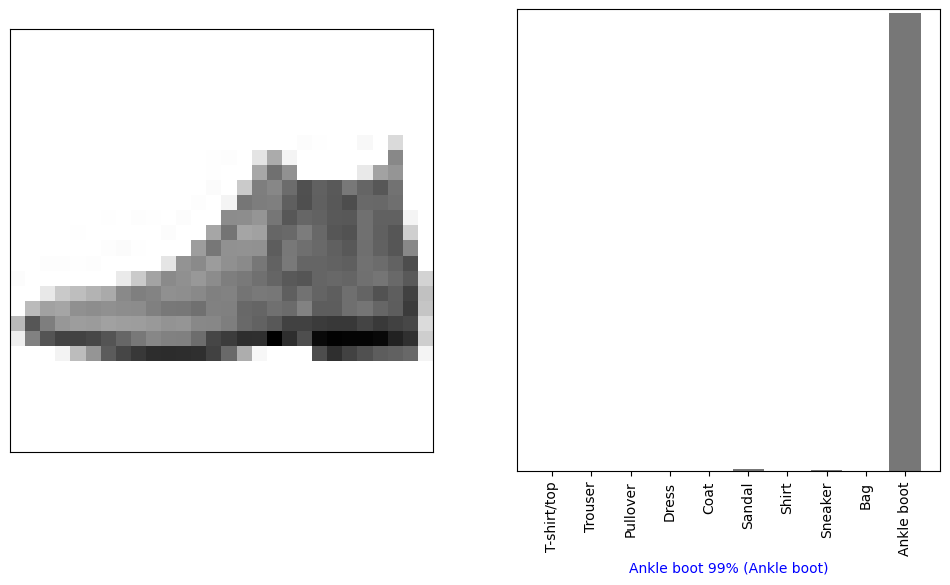

In [61]:
i = 0
plt.figure(figsize=(12,6))

# Plot the image
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)

# Plot the prediction values
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels, class_names)

plt.show()


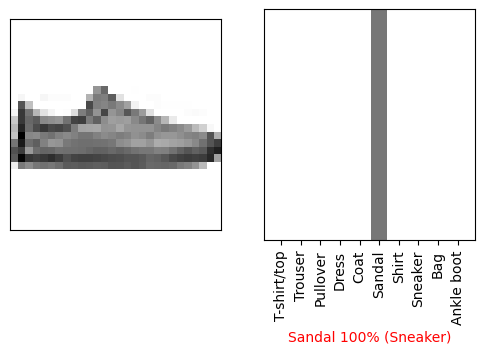

In [72]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels,class_names)
plt.show()


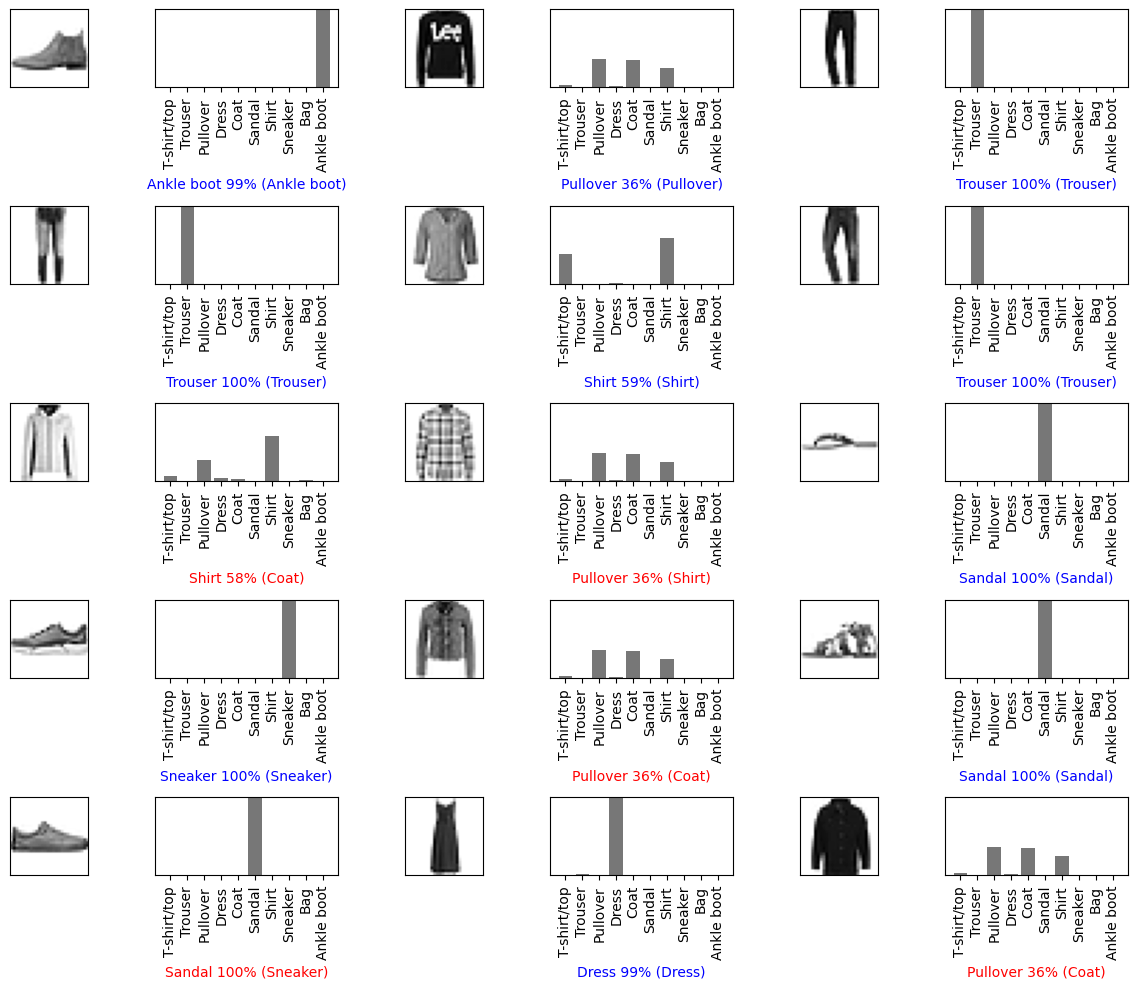

In [73]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
 plt.subplot(num_rows, 2*num_cols, 2*i+1)
 plot_image(i, predictions[i], test_labels, test_images)
 plt.subplot(num_rows, 2*num_cols, 2*i+2)
 plot_value_array(i, predictions[i], test_labels,class_names)
plt.tight_layout()
plt.show()

In [74]:
img = test_images[1]
print(img.shape)

(28, 28)


In [75]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [76]:
predictions_single = probability_model.predict(img)
print(predictions_single)


1/1 [==============================] - 0s 17ms/step
[[2.3025382e-02 1.6731846e-03 3.5887134e-01 1.6442433e-02 3.4568095e-01
  2.9389008e-03 2.4018134e-01 2.6985167e-03 8.1939623e-03 2.9403373e-04]]


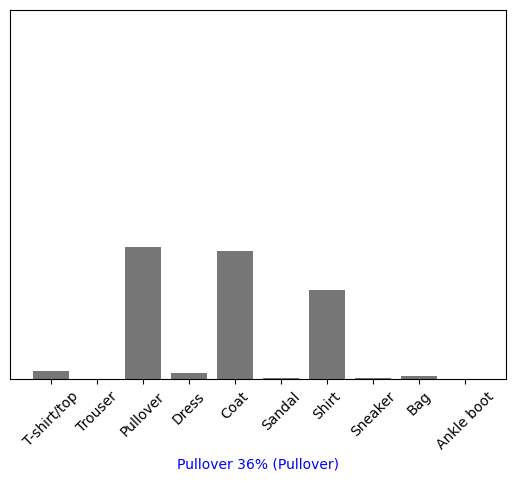

In [79]:
plot_value_array(1, predictions_single[0], test_labels, class_names)
_= plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [80]:
np.argmax(predictions_single[0])

2